# Abstract 
**Regression**

This is a customer churn dataset. we have features ranging from customer demographics ,customer account information to services each customer has subscribed to.<br>
This work is my attempt to predict the **Total Charges** inflicted to the customer depending on the services and all other factors from the dataset.<br>
Linear Regression,Knn and Decision Tree algorithms are used to predict the Total Charges.The models accuracy is compared and the best is choosen.



## Importing all the required packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor as Knn
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
import math as m

## Loading the dataset

In [2]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [3]:
data.shape

(7043, 21)

In [4]:
data.isna().sum()
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.drop(columns=['customerID','Churn'],axis=1,inplace=True)

In [6]:
data['SeniorCitizen'].replace([1],'Yes',inplace=True)
data['SeniorCitizen'].replace([0],'No',inplace=True)     
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data.drop(index=data.loc[data['TotalCharges'].isna()].index,axis=0,inplace=True)

In [7]:
data1=data.copy(deep=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
sc = data.groupby(['gender','SeniorCitizen']).mean()
sc.reset_index(inplace=True)
sc
#px.bar(sc,x='gender',y='TotalCharges',facet_col='SeniorCitizen',category_orders={'SeniorCitizen':['No','Yes']})

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,No,32.226415,62.119811,2174.707256
1,Female,Yes,32.621479,81.109771,2839.934067
2,Male,No,32.277647,61.656101,2187.343126
3,Male,Yes,33.963415,78.544425,2781.304355


In [9]:
part = data.groupby('Partner').sum()
part.reset_index(inplace=True)
part
px.pie(names=part['Partner'],values=part['TotalCharges'])

In [10]:
dep = data.groupby('Dependents').sum()
dep.reset_index(inplace=True)
px.pie(names=dep['Dependents'],values=dep['TotalCharges'])

In [11]:
deppat = data.groupby(['Partner','Dependents']).mean()
deppat.reset_index(inplace=True)
px.bar(deppat,x='Partner',y='MonthlyCharges',facet_col='Dependents')


In [12]:
gen = data.groupby(['gender','SeniorCitizen','Partner','Dependents']).mean()
gen.reset_index(inplace=True)
px.bar(gen,y='TotalCharges',x='gender',facet_col='SeniorCitizen',facet_row='Partner',color='Dependents',barmode='group')

In [13]:
px.scatter(x=data['tenure'],y=data['MonthlyCharges'],labels={'x':'tenure','y':'MonthlyCharges'})

In [14]:
ps = data.groupby('PhoneService').sum()
ps.reset_index(inplace=True)
px.pie(names=ps['PhoneService'],values=ps['TotalCharges'])

In [15]:
ml=data.groupby('MultipleLines').sum()
ml.reset_index(inplace=True)
px.pie(names=ml['MultipleLines'],values=ml['TotalCharges'])

In [16]:
Is = data.groupby('InternetService').sum()
Is.reset_index(inplace=True)
px.pie(names=Is['InternetService'],values=Is['TotalCharges'])

In [17]:
npi = data.groupby(['PhoneService','InternetService']).sum()
#npi.get_group(('No','Fiber optic'))['Total Charges'].sum()
npi.reset_index(inplace=True)
npi

,PhoneService,InternetService,tenure,MonthlyCharges,TotalCharges
0,No,DSL,21645,28554.90,1020294.95
1,Yes,DSL,57816,111785.75,4101115.90
2,Yes,Fiber optic,101914,283284.40,9923622.95
3,Yes,No,46615,32035.95,1011134.90


In [18]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [19]:
cont = data.groupby('Contract').mean()
cont.reset_index(inplace=True)
px.scatter(data,x='TotalCharges',y='tenure',facet_col='Contract')

In [20]:
for x in data.columns:
    print(x ,' : ' ,data[x].unique())
    print(data[x].value_counts())
    print('\n')

gender  :  ['Female' 'Male']
Male      3549
Female    3483
Name: gender, dtype: int64


SeniorCitizen  :  ['No' 'Yes']
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64


Partner  :  ['Yes' 'No']
No     3639
Yes    3393
Name: Partner, dtype: int64


Dependents  :  ['No' 'Yes']
No     4933
Yes    2099
Name: Dependents, dtype: int64


tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64


PhoneService  :  ['No' 'Yes']
Yes    6352
No      680
Name: PhoneService, dtype: int64


MultipleLines  :  ['No phone service' 'No' 'Yes']
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


InternetService  :  ['DSL

In [21]:
data.shape

(7032, 19)

## Linear Regression

In [22]:
noweb = data[data['InternetService'] =='No']
nophone = data[data['MultipleLines'] =='No phone service']

data.drop(index=noweb.index,axis=0,inplace=True)
data.drop(index=nophone.index,axis=0,inplace=True)
data.drop(columns=['MonthlyCharges'],inplace=True,axis=1)

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.50
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1949.40


In [24]:
data_mod = pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)
#'Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security'
data_mod.replace(to_replace='No',value='0',inplace=True)
data_mod.replace(to_replace='Yes',value='1',inplace=True)
data_mod['gender'].replace(to_replace='Female',value='1',inplace=True)
data_mod['gender'].replace(to_replace='Male',value='0',inplace=True)
data_mod.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,TotalCharges,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,0,1,108.15,0,0,0,0,0,1
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,151.65,1,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,1,1,1,820.50,1,0,0,0,1,0
6,0,0,0,1,22,1,1,0,1,0,...,1,0,1,1949.40,1,0,0,1,0,0


In [25]:
#cor = 
data_mod.corr()
#plt.figure(figsize=(40,40))
#sns.heatmap(cor, annot=True)
#plt.rcParams['figure.figsize'] = [40, 40]
#plt.rcParams['figure.dpi'] = 100
#data_mod.corr()

,tenure,TotalCharges,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.957923,-0.007522,0.284634,0.578096,0.246812,-0.270290,-0.178309
TotalCharges,0.957923,1.000000,0.167439,0.252455,0.559846,0.224252,-0.215479,-0.203806
InternetService_Fiber optic,-0.007522,0.167439,1.000000,-0.084906,-0.159106,-0.070851,0.264729,-0.239912
Contract_One year,0.284634,0.252455,-0.084906,1.000000,-0.237699,0.089704,-0.130637,-0.002410
Contract_Two year,0.578096,0.559846,-0.159106,-0.237699,1.000000,0.190070,-0.259236,-0.056046
PaymentMethod_Credit card (automatic),0.246812,0.224252,-0.070851,0.089704,0.190070,1.000000,-0.442484,-0.216950
PaymentMethod_Electronic check,-0.270290,-0.215479,0.264729,-0.130637,-0.259236,-0.442484,1.000000,-0.351309
PaymentMethod_Mailed check,-0.178309,-0.203806,-0.239912,-0.002410,-0.056046,-0.216950,-0.351309,1.000000


In [26]:
data_mod.drop(index=data.loc[data_mod['TotalCharges'].isna()].index,axis=0,inplace=True)
x = data_mod.drop(columns='TotalCharges',axis=1)
y = data_mod['TotalCharges']

In [27]:
x.isna().sum()
y.isna().sum()

0

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [29]:
model = sm.OLS(y_train.astype(float),sm.add_constant(x_train.astype(float))).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     5364.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:26:00   Log-Likelihood:                -25314.
No. Observations:                3382   AIC:                         5.067e+04
Df Residuals:                    3362   BIC:                         5.079e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Back Propagation to select significant variables

In [30]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y.astype(float), sm.add_constant(pd.DataFrame(X[included].astype(float)))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {} with p-value {} '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [31]:
backward_regression(x,y)

Drop Contract_One year with p-value 0.7393029296676181 
Drop PaymentMethod_Credit card (automatic) with p-value 0.7002469669494795 
Drop PaymentMethod_Electronic check with p-value 0.7497228888656782 
Drop SeniorCitizen with p-value 0.3307159921026457 
Drop PaperlessBilling with p-value 0.30868970966254633 
Drop Partner with p-value 0.2703842891807341 
Drop Dependents with p-value 0.06649723954680571 


['gender',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'InternetService_Fiber optic',
 'Contract_Two year',
 'PaymentMethod_Mailed check']

In [32]:
data_mod.drop(columns='PaymentMethod_Credit card (automatic)',axis=1,inplace=True)
data_mod.drop(columns='Contract_One year',axis=1,inplace=True) 
data_mod.drop(columns='PaymentMethod_Electronic check',axis=1,inplace=True) 
data_mod.drop(columns='SeniorCitizen',axis=1,inplace=True) 
data_mod.drop(columns='Partner',axis=1,inplace=True) 
data_mod.drop(columns='PaperlessBilling',axis=1,inplace=True) 
data_mod.drop(columns='Dependents',axis=1,inplace=True)

In [33]:
x = data_mod.drop(columns='TotalCharges',axis=1)
y = data_mod['TotalCharges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [34]:
model = sm.OLS(y_train.astype(float),sm.add_constant(x_train.astype(float))).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     8490.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:26:01   Log-Likelihood:                -25318.
No. Observations:                3382   AIC:                         5.066e+04
Df Residuals:                    3369   BIC:                         5.074e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gender            

## Model accuracy


In [35]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
predict = model1.predict(x_test)

print(r2_score(y_test,predict))



0.9649555170852671


## Regression when there is no internet service

In [36]:
noweb.drop(noweb.iloc[:,7:14],axis=1,inplace=True)
noweb.drop(columns='MonthlyCharges',axis=1,inplace=True)
noweb

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,TotalCharges
11,Male,No,No,No,16,Yes,No,Two year,No,Credit card (automatic),326.80
16,Female,No,No,No,52,Yes,No,One year,No,Mailed check,1022.95
21,Male,No,Yes,No,12,Yes,No,One year,No,Bank transfer (automatic),202.25
22,Male,No,No,No,1,Yes,No,Month-to-month,No,Mailed check,20.15
33,Male,No,No,No,1,Yes,No,Month-to-month,No,Bank transfer (automatic),20.20
...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,No,No,No,51,Yes,No,Two year,No,Bank transfer (automatic),1020.75
7019,Female,No,No,No,39,Yes,No,Two year,No,Mailed check,826.00
7020,Male,No,Yes,Yes,12,Yes,No,Month-to-month,Yes,Electronic check,239.00
7030,Female,No,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,39.25


In [37]:
noweb.replace(to_replace='No',value='0',inplace=True)
noweb.replace(to_replace='Yes',value='1',inplace=True)

noweb.replace(to_replace='Male',value='1',inplace=True)
noweb.replace(to_replace='Female',value='0',inplace=True)
noweb_mod = pd.get_dummies(noweb,columns=['Contract','PaymentMethod'],drop_first=True)
noweb_mod

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4382: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
11,1,0,0,0,16,1,0,0,326.80,0,1,1,0,0
16,0,0,0,0,52,1,0,0,1022.95,1,0,0,0,1
21,1,0,1,0,12,1,0,0,202.25,1,0,0,0,0
22,1,0,0,0,1,1,0,0,20.15,0,0,0,0,1
33,1,0,0,0,1,1,0,0,20.20,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,0,0,0,0,51,1,0,0,1020.75,0,1,0,0,0
7019,0,0,0,0,39,1,0,0,826.00,0,1,0,0,1
7020,1,0,1,1,12,1,0,1,239.00,0,0,0,1,0
7030,0,0,0,0,2,1,0,1,39.25,0,0,0,0,1


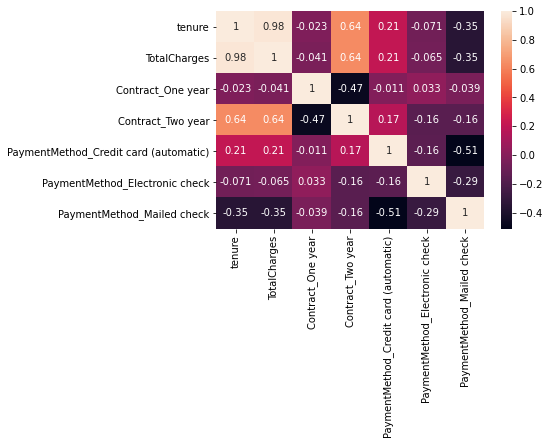

In [38]:
corr1 = noweb_mod.corr()
sns.heatmap(corr1,annot=True)

In [39]:
x9 = noweb_mod.drop(columns='TotalCharges')
y9 = noweb_mod['TotalCharges']

In [40]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x9,y9,test_size=0.3,random_state=125)

In [41]:
model2 = sm.OLS(y_train5.astype(float),sm.add_constant(x_train5.astype(float))).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6291.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:26:03   Log-Likelihood:                -5946.0
No. Observations:                1064   AIC:                         1.192e+04
Df Residuals:                    1051   BIC:                         1.198e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [42]:
model5 = LinearRegression()
model5.fit(x_train5,y_train5)
predict = model5.predict(x_test5)

print(r2_score(y_test5,predict))

0.9874234811809572


## Knn

In [43]:
data_mod1 = pd.get_dummies(data1,columns=['InternetService','Contract','PaymentMethod','MultipleLines','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
#'Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security'
data_mod1.replace(to_replace='No',value='0',inplace=True)
data_mod1.replace(to_replace='Yes',value='1',inplace=True)
data_mod1['gender'].replace(to_replace='Female',value='1',inplace=True)
data_mod1['gender'].replace(to_replace='Male',value='0',inplace=True)
data_mod1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,1,29.85,29.85,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,34,0,56.95,1889.50,1,0,...,1,1,0,0,1,0,0,1,0,0
2,0,0,0,0,2,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,45,0,42.30,1840.75,1,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,0,2,1,70.70,151.65,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
x1 = data_mod1.drop(columns=['TotalCharges'],axis=1)
y1 = data_mod1['TotalCharges']

In [45]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=122)
x_train1.shape
x_test1.shape
y_train1.shape
y_test1.shape

(2110,)

In [46]:
scaler = MinMaxScaler()
x_train_stand = scaler.fit_transform(x_train1)
x_test_stand = scaler.fit_transform(x_test1)

In [47]:
mse1 = []
r2 = []
for x in range(1,27):
  kNN = Knn(n_neighbors=x,p=2,metric='minkowski')
  kNN.fit(x_train_stand,y_train1)
  predictKnn = kNN.predict(x_test_stand)
  #mse1.append(mse(y_test1,predictKnn))
  r2.append(kNN.score(x_test_stand,y_test1))

0     0.747615
1     0.817171
2     0.834858
3     0.842906
4     0.846478
5     0.848381
6     0.849937
7     0.851656
8     0.854207
9     0.856258
10    0.857879
11    0.860510
12    0.861482
13    0.860461
14    0.859514
15    0.858893
16    0.859433
17    0.859772
18    0.860015
19    0.859817
20    0.859703
21    0.860279
22    0.860424
23    0.860104
24    0.860015
25    0.859966
dtype: float64


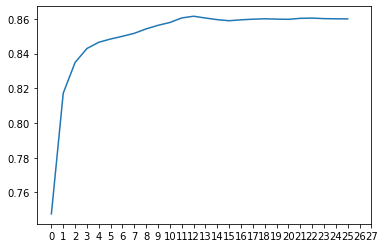

In [48]:

values = pd.Series(r2)
#knnvalue = np.hstack((index,values))
#values = np.array(values)
print(values)
plt.plot(values.index,values)
plt.xticks(range(0,28))
plt.show()

In [49]:
kNN = Knn(n_neighbors=11,p=2)
kNN.fit(x_train_stand,y_train1)
predictKnn = kNN.predict(x_test_stand)

In [50]:
r2_score(y_test1,predictKnn)

0.8578785630549868

## Decision Tree


In [51]:
data_mod2 = pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod','MultipleLines','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
data_mod2.replace(to_replace='No',value='0',inplace=True)
data_mod2.replace(to_replace='Yes',value='1',inplace=True)
data_mod2['gender'].replace(to_replace='Female',value='1',inplace=True)
data_mod2['gender'].replace(to_replace='Male',value='0',inplace=True)
data_mod2.head()
#data_mod2.drop(columns=['Monthly Charges'],axis=1,inplace=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1,0,0,0,0,34,0,1889.50,1,0,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,0,2,1,108.15,1,0,1,...,0,1,1,0,1,0,1,0,1,0
4,1,0,0,0,2,1,151.65,0,1,1,...,1,0,1,0,1,0,1,0,1,0
5,1,0,0,0,8,1,820.50,0,1,1,...,1,0,0,1,1,0,0,1,0,1
6,0,0,0,1,22,1,1949.40,0,1,1,...,0,1,1,0,1,0,0,1,1,0


In [52]:
x3= data_mod2.drop(columns='TotalCharges',axis=1)
y3 = data_mod2['TotalCharges']

In [53]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.3,random_state=121)

In [54]:
tree1 = DecisionTreeRegressor()
tree1.fit(x_train3,y_train3)
predict3 = tree1.predict(x_test3)
r2_score(y_test3,predict3)

0.9890266912327079

In [55]:
x = pd.DataFrame(data_mod2.columns)
x.columns=['Feature']
x.reset_index(inplace=True)
x.drop(columns='index',axis=1,inplace=True)
x.drop(index=5,inplace=True)
tree1.feature_importances_.shape
x['Importance']=tree1.feature_importances_
x.sort_values(by='Importance',ascending=False,inplace=True)
px.bar(x=x.Feature,y=x.Importance,labels={'y':'Score'},title="Feature importance with Tenure included")

In [56]:
data_mod3 = pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod','MultipleLines','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
data_mod3.replace(to_replace='No',value='0',inplace=True)
data_mod3.replace(to_replace='Yes',value='1',inplace=True)
data_mod3['gender'].replace(to_replace='Female',value='1',inplace=True)
data_mod3['gender'].replace(to_replace='Male',value='0',inplace=True)
data_mod3.head()
data_mod3.drop(columns='tenure',axis=1,inplace=True)

In [57]:
x4= data_mod3.drop(columns='TotalCharges',axis=1)
y4 = data_mod3['TotalCharges']

In [58]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size=0.3,random_state=121)
x_train4.shape
x_test4.shape
y_train4.shape
y_test4.shape

(1450,)

In [59]:
tree2 = DecisionTreeRegressor()
tree2.fit(x_train4,y_train4)
predict4 = tree2.predict(x_test4)
r2_score(y_test4,predict4)

0.5151798483419545

In [60]:
x1 = pd.DataFrame(data_mod3.columns)
x1.columns=['Feature']
x1.reset_index(inplace=True)
x1.drop(columns='index',axis=1,inplace=True)
x1.drop(index=5,inplace=True)
tree2.feature_importances_.shape
x1['Importance']=tree2.feature_importances_
x1.sort_values(by='Importance',ascending=False,inplace=True)
px.bar(x=x1.Feature,y=x1.Importance,labels={'y':'Score'},title="Feature importance without Tenure")

## Conclusion

We have predicted the Total Charges based on the given data and we see that linear regression gives the best prediction accuracy score among the models.

**Decision Tree:**<br>
We have an accuracy score of **0.98** with this model.
We find the feature importance with Tenure and Monthly charges included and also with them being neglected.

With Tenure and Monthly charges included they dominate the other features and they highly influence the output variable.

with Tenure and Monthly Charges removed we can actually discover the other features which are important.
We find people having month to month contract seem to be contributing to the total charges, the next important feature in line being people opting Optic Fiber for thier internet connection.

**Knn:**<br>
With Knn we see we get a food prediction accuracy at **k = 11**. We see an accuracy of **0.86**. This model is not much interpretable.

**Linear Regression:**<br>
with Linear Regression we find Fiber optic connection has higher weightage followed by streaming Tv and Streaming Movies. 
Phone connection has the highest negative relation with output. 
We also find that the model is giving an accuracy of **0.96** which is pretty good.

When I run the model with no Internet connection I have Multiple phone connection contributing the highest to the total charges, followed by the tenure and payment method with check.

**Verdict:**<br>
With the models outputs and accuray levels I would prefer going with the Linear Regression model to predict the output because of :
<br>
The model is highly interpretable.<br>
Changes in the input can be observed with the output to a high degree.